# 1 Importamos librerías

In [33]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
from tqdm .keras import TqdmCallback

# 2 Descargamos los datos de imdb - Keras

In [34]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 3 Transformamos datos
Función de one-hot encoding

In [35]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

In [36]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

# 4 probamos diferentes modelos 

## Red neuronal original

In [38]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))


model1.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

### Comparando un modelo más pequeño

In [39]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

## Regularización

In [40]:
from keras import regularizers

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

### Dropout

In [41]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

# 5 entrenamos modelos

In [42]:
modelos = {"normal_model": model1,  "small_model": model2, "regularized_model": model3, "dropout_model": model4}
histories = {}
for nombre, modelo in modelos.items():
    print(f"training --{name}--")

    histories[nombre] = modelo.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val),
                    verbose=0, 
                    callbacks= [TqdmCallback(verbose=1)])
    print("*"*50)

training --dropout_model--


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**************************************************
training --dropout_model--


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**************************************************
training --dropout_model--


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**************************************************
training --dropout_model--


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**************************************************


In [43]:
histories["normal_model"].history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [64]:
# calculating overfitting point based on training loss and validation loss 
of_points = {}
for name, history in histories.items():
  distances = []
  for (l, vl) in zip(history.history['loss'], history.history['val_loss']):
    distances.append(np.abs(l - vl))
  of_points[name] = np.argmin(distances)+ 1 # 1 significa una correccion

In [62]:
of_points

{'normal_model': 1.5,
 'small_model': 2.5,
 'regularized_model': 1.5,
 'dropout_model': 4.5}

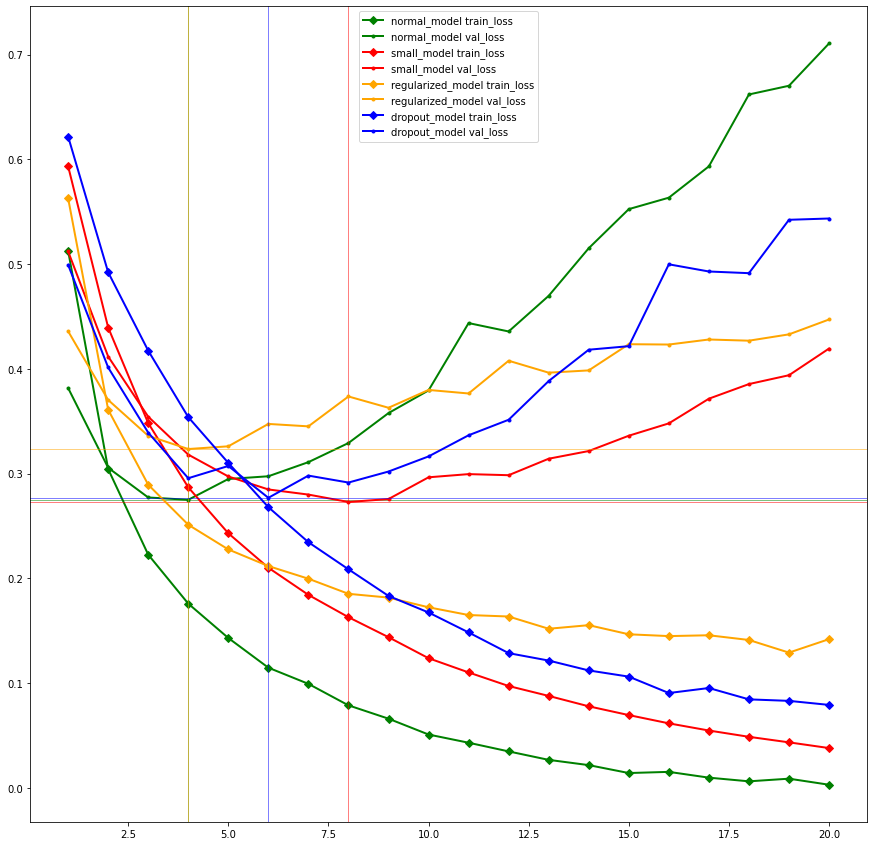

In [73]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15,15))
epoch = range(1,len(histories["normal_model"].history['loss'])+1)
colors = ["red", "orange", "blue", "green"]


for n, item in enumerate(histories.items()):
  name, history = item
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  plt.plot(epoch,loss_values,color = colors[n-1], marker= 'D',label=f'{name} train_loss', linewidth=2)
  plt.plot(epoch,val_loss_values, color = colors[n-1], marker= '.',label=f'{name} val_loss', linewidth=2)
  
  #plt.axvline(x = of_points[name], color = colors[n-1], alpha=0.5) # label = 'axvline - full height' # show overfitting break point 

  plt.axvline(x = np.argmin(val_loss_values)+ 1, color = colors[n-1], alpha=0.5, linewidth=1) # marca el lugar donde se alcanza el val_loss mas bajo
  plt.axhline(y = np.min(val_loss_values), color = colors[n-1], alpha=0.5, linewidth=1)
  plt.legend()
plt.show()

En este problema especifico vemos que el mejor modelo es el verde (modelo normal) esto debido a que alcanza una loss baja, pero en menos epocas que los demas. 

pero no falta mas analisis dado que habira que evaluar el tiempo de computo y asi poder tomar una decision de que modelo es mejor.   
podemos decir que el modelo regularizado (amarillo) es el unico que no logra llegar al punto minimo de la funcion de coste.